In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch

In [2]:
housing = fch()

In [3]:
x = pd.DataFrame(housing.data)

In [4]:
x

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y = housing.target

In [6]:
x.shape,y.shape

((20640, 8), (20640,))

In [7]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
x.columns = housing.feature_names

In [9]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=420)

In [11]:
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])

In [12]:
reg = LR(normalize=True).fit(xtrain,ytrain)

In [13]:
yhat = reg.predict(xtest)


In [14]:
reg.coef_

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [15]:
[*zip(xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968405),
 ('HouseAge', 0.010211268294494038),
 ('AveRooms', -0.10780721617317683),
 ('AveBedrms', 0.6264338275363789),
 ('Population', 5.216125353267348e-07),
 ('AveOccup', -0.003348509646333596),
 ('Latitude', -0.41309593789477145),
 ('Longitude', -0.42621095362084727)]

In [16]:
# 我们有两种不同的
# 角度来看待回归的效果：
# 第一，我们是否预测到了正确的数值。


from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae

In [17]:
# MSE:mean squared error
mse(yhat,ytest),ytest.mean() # 错误率 大约25%

(0.5309012639324573, 2.0819292877906976)

In [18]:
# mean absolute error
mae(yhat,ytest)

0.5307069814636151

In [19]:
y.max()

5.00001

In [20]:
yhat.max()

7.146198214270868

In [21]:
y.min()

0.14999

In [22]:
-cross_val_score(reg,x,y,cv=10,scoring="neg_mean_squared_error").mean()

0.5509524296956597

In [23]:
-cross_val_score(reg,x,y,cv=10,scoring="neg_mean_absolute_error").mean()

0.5445214393266333

In [24]:
# klearn中的参数scoring下，均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考
# 虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)。在sklearn当中，所有
# 的损失都使用负数表示，因此均方误差也被显示为负数了。真正的均方误差MSE的数值
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

![avatar](./菜菜.jpg)

In [25]:
# 第二，我们是否拟合到了足够的信息。
from sklearn.metrics import r2_score
# r2_score(yhat,ytest)错误的，必须真实标签在前

In [26]:
reg.score(xtest,ytest)

0.6043668160178816

In [27]:
# 相同的评估指标不同的结果  R**2
r2_score(ytest,yhat)

0.6043668160178816

In [28]:
cross_val_score(reg,x,y,cv=10,scoring='r2').mean()

0.511006861052455

![avatar](./岭回归.jpg)

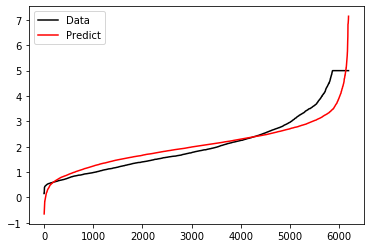

In [29]:
plt.plot(range(len(ytest)),sorted(ytest),c='black',label='Data')
plt.plot(range(len(yhat)),sorted(yhat),c='red',label='Predict')
plt.legend()
plt.show()

In [30]:
# 一个与 非常相似的指标叫做可解释性方差分数（explained_variance_score，EVS）
from sklearn.metrics import explained_variance_score as EVS

In [31]:
EVS(ytest,yhat)

0.60461026738544

In [32]:
# 多重共线性
# 精确相关关系和高度相关关系并称为"多重共线性"
# 多重共线性如果存在，则线性回归就无法使用最小二乘法来进行求解，或者求解就会出现偏差。幸运的是，不能存在
# 多重共线性，不代表不能存在相关性——机器学习不要求特征之间必须独立，必须不相关，只要不是高度相关或者精
# 确相关就好。

In [33]:
# 多重共线性是一种统计现象，是指线性模型中的特征（解释变量）之间由于存在精确相关关系或高度相关关系，
# 多重共线性的存在会使模型无法建立，或者估计失真。多重共线性使用指标方差膨胀因子（variance inflation
# factor，VIF）来进行衡量（from statsmodels.stats.outliers_influence import variance_inflation_factor），
# 通常当我们提到“共线性”，都特指多重共线性。
# 相关性是衡量两个或多个变量一起波动的程度的指标，它可以是正的，负的或者0。当我们说变量之间具有相关
# 性，通常是指线性相关性，线性相关一般由皮尔逊相关系数进行衡量，非线性相关可以使用斯皮尔曼相关系数或
# 者互信息法进行衡量。


In [34]:
# 岭回归解决多重共线性问题

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [36]:
housevalue = fch()

In [37]:
x = pd.DataFrame(housevalue.data)
y = housevalue.target

In [38]:
x.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]


In [39]:
Xtrain,Xtest,Ytrain,Ytest = TTS(x,y,test_size=0.3,random_state=420)

In [40]:
Xtrain.head()

,住户收入中位数,房屋使用年代中位数,平均房间数目,平均卧室数目,街区人口,平均入住率,街区的纬度,街区的经度
17073,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
16956,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
20012,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
13072,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
8457,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [41]:
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [42]:
reg = Ridge(alpha=1).fit(Xtrain,Ytrain)

In [43]:
reg.score(Xtest,Ytest)

0.6043610352312278

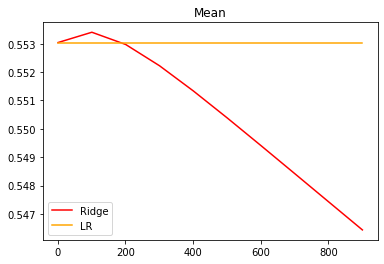

In [44]:
alpharange = np.arange(1,1000,100)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    regs = cross_val_score(reg,x,y,cv=5,scoring = "r2").mean()
    linears = cross_val_score(linear,x,y,cv=5,scoring = "r2").mean()
    ridge.append(regs)
    lr.append(linears)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()


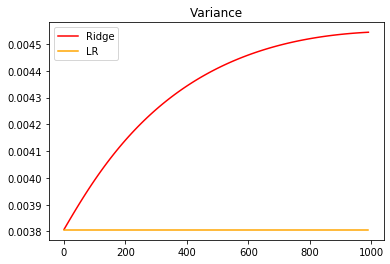

In [45]:
alpharange = np.arange(1,1000,10)
ridge, lr = [], []
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    linear = LinearRegression()
    varR = cross_val_score(reg,x,y,cv=5,scoring="r2").var()
    varLR = cross_val_score(linear,x,y,cv=5,scoring="r2").var()
    ridge.append(varR)
    lr.append(varLR)
plt.plot(alpharange,ridge,color="red",label="Ridge")
plt.plot(alpharange,lr,color="orange",label="LR")
plt.title("Variance")
plt.legend()
plt.show()

In [46]:
alpharange

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score


In [48]:
boston = load_boston()
x = boston.data
y = boston.target

In [49]:
xtrain,xtest,ytrian,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

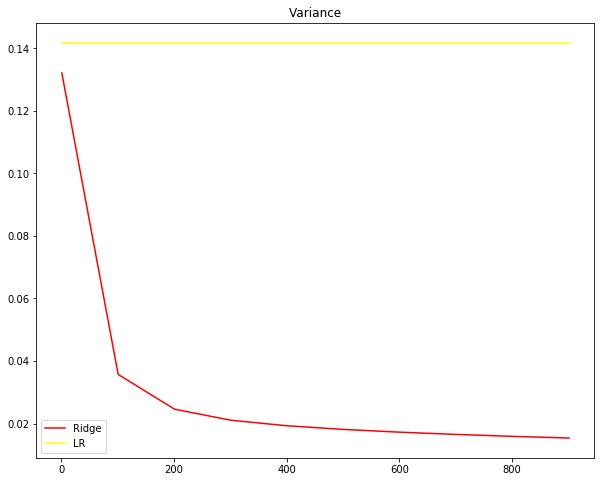

In [50]:
alpharange =np.arange(1,1001,100)
ridge,lg = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    lr = LinearRegression()
    varR = cross_val_score(reg,x,y,cv=5,scoring='r2').var()
    varLR = cross_val_score(lr,x,y,cv=5,scoring='r2').var()
    ridge.append(varR)
    lg.append(varLR)
plt.figure(figsize=(10,8))
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lg,color='yellow',label='LR')
plt.title('Variance')
plt.legend()
plt.show()

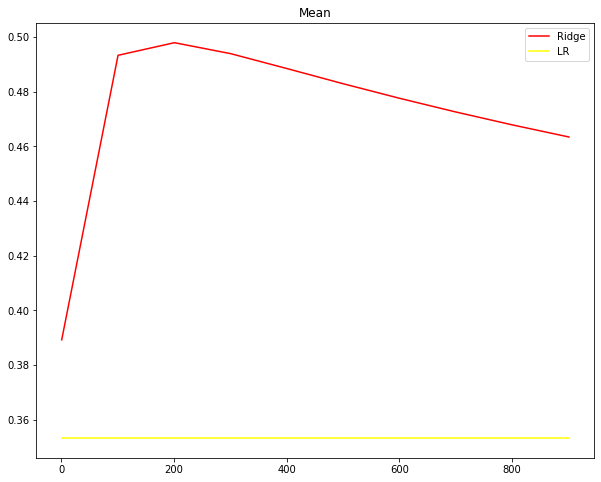

In [51]:
alpharange =np.arange(1,1001,100)
ridge,lg = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    lr = LinearRegression()
    varR = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
    varLR = cross_val_score(lr,x,y,cv=5,scoring='r2').mean()
    ridge.append(varR)
    lg.append(varLR)
plt.figure(figsize=(10,8))
plt.plot(alpharange,ridge,color='red',label='Ridge')
plt.plot(alpharange,lg,color='yellow',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

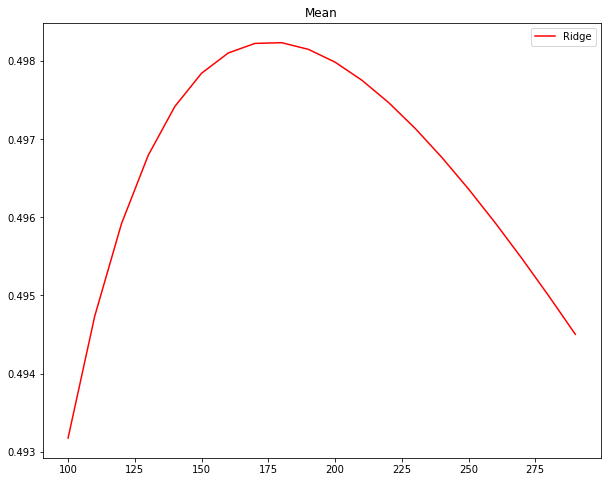

In [52]:
alpharange =np.arange(100,300,10)
ridge,lg = [],[]
for alpha in alpharange:
    reg = Ridge(alpha=alpha)
    lr = LinearRegression()
    varR = cross_val_score(reg,x,y,cv=5,scoring='r2').mean()
#     varLR = cross_val_score(lr,x,y,cv=5,scoring='r2').mean()
    ridge.append(varR)
    lg.append(varLR)
plt.figure(figsize=(10,8))
plt.plot(alpharange,ridge,color='red',label='Ridge')
# plt.plot(alpharange,lg,color='yellow',label='LR')
plt.title('Mean')
plt.legend()
plt.show()

D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-

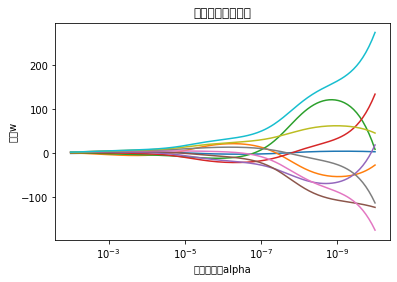

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#创造10*10的希尔伯特矩阵
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
#计算横坐标
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
#建模，获取每一个正则化取值下的系数组合
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
#绘图展示结果
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  #将横坐标逆转
plt.xlabel('正则化参数alpha')
plt.ylabel('系数w')
plt.title('岭回归下的岭迹图')
plt.axis('tight')
plt.show()

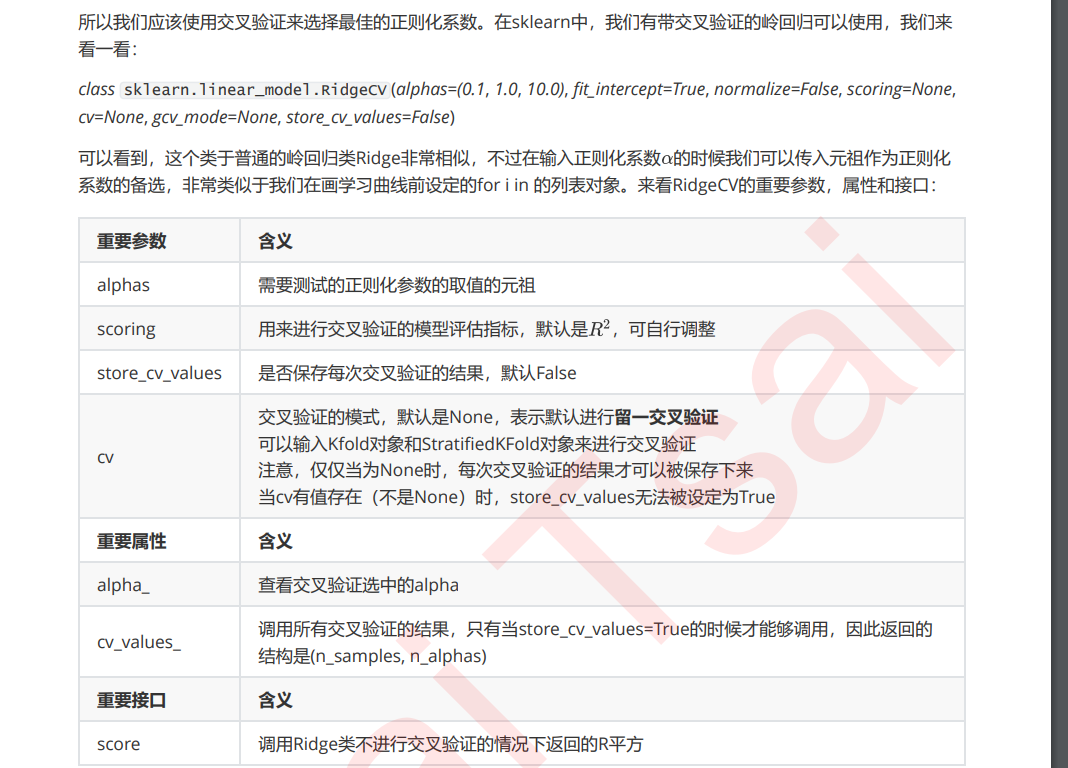

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
Ridge_ = RidgeCV(alphas=np.arange(1,1002,100)
#                 ,scoring="neg_mean_squared_error"
                 ,store_cv_values=True
                #,cv=5
               ).fit(X, y)

In [55]:
Ridge_.score(X,y)

0.6060251767338437

In [56]:
Ridge_.cv_values_

array([[0.1557472 , 0.16301246, 0.16892723, ..., 0.19182353, 0.19466385,
        0.1973722 ],
       [0.15334566, 0.13922075, 0.12849014, ..., 0.09344092, 0.08981868,
        0.08651042],
       [0.02429857, 0.03043271, 0.03543001, ..., 0.05126165, 0.05253834,
        0.05358811],
       ...,
       [0.56545783, 0.5454654 , 0.52655917, ..., 0.43130136, 0.41790336,
        0.40509233],
       [0.27883123, 0.2692305 , 0.25944481, ..., 0.20497018, 0.19698274,
        0.18931857],
       [0.14313527, 0.13967826, 0.13511341, ..., 0.10251737, 0.0973334 ,
        0.09233102]])

In [57]:
Ridge_.cv_values_.mean(axis=0)

array([0.52823795, 0.52787439, 0.52807763, 0.52855759, 0.52917958,
       0.52987689, 0.53061486, 0.53137481, 0.53214638, 0.53292369,
       0.53370332])

In [58]:
np.arange(1,1002,100)


array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001])

In [59]:
Ridge_.alpha_

101

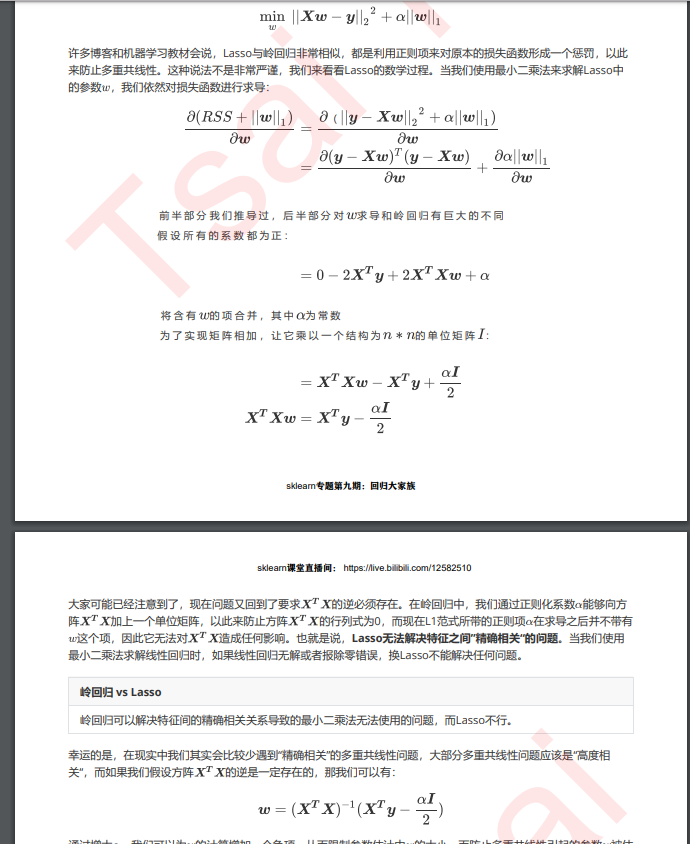

In [60]:
#lasso
# Lasso无法解决特征之间”精确相关“的问题。当我们使用
# 最小二乘法求解线性回归时，如果线性回归无解或者报除零错误，换Lasso不能解决任何问题
#核心作用，特征选择

In [61]:
# class sklearn.linear_model.Lasso (alpha=1.0, fit_intercept=True, normalize=False, precompute=False,
# copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt


In [63]:
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
X.head()
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)
#恢复索引
for i in [Xtrain,Xtest]:
    i.index = range(i.shape[0])

In [64]:
reg = LinearRegression().fit(Xtrain,Ytrain)
(reg.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494025,
 -10.780721617317683,
 62.64338275363768,
 5.216125353123053e-05,
 -0.3348509646333473,
 -41.309593789477155,
 -42.621095362084674]

In [65]:
Ridge = Ridge(alpha=0,).fit(Xtrain,Ytrain)
(Ridge.coef_*100).tolist()

[43.73589305968403,
 1.0211268294494154,
 -10.780721617317607,
 62.643382753637326,
 5.216125353271531e-05,
 -0.3348509646333586,
 -41.30959378947669,
 -42.62109536208426]

In [66]:
lasso_ = Lasso(alpha=0).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3769.8607714139116, tolerance: 1.917255476913148
  positive)


[43.73589305968403,
 1.0211268294494054,
 -10.780721617317662,
 62.64338275363783,
 5.216125353266305e-05,
 -0.33485096463335706,
 -41.309593789477205,
 -42.62109536208479]

In [67]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

In [68]:
Ridge_ = Ridge(alpha=0.01).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()

[43.735757206216036,
 1.021129231812184,
 -10.780460336251682,
 62.64202320775678,
 5.217068073243963e-05,
 -0.33485065170676265,
 -41.3095714322911,
 -42.62105388932374]

In [69]:
#Lasso进行拟合
lasso_ = Lasso(alpha=0.01).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()

[40.10568371834487,
 1.0936292607860147,
 -3.74237636102446,
 26.524037834897218,
 0.0003525368511503943,
 -0.3207129394887799,
 -40.06483047344841,
 -40.81754399163314]

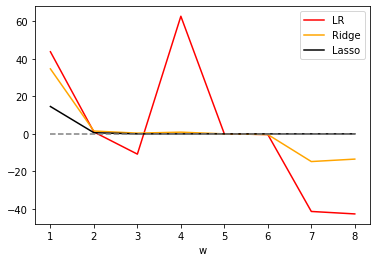

In [70]:
Ridge_ = Ridge(alpha=10**4).fit(Xtrain,Ytrain)
(Ridge_.coef_*100).tolist()
lasso_ = Lasso(alpha=10**4).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#看来10**4对于Lasso来说是一个过于大的取值
lasso_ = Lasso(alpha=1).fit(Xtrain,Ytrain)
(lasso_.coef_*100).tolist()
#将系数进行绘图
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="red",label="LR")
plt.plot(range(1,9),(Ridge_.coef_*100).tolist(),color="orange",label="Ridge")
plt.plot(range(1,9),(lasso_.coef_*100).tolist(),color="k",label="Lasso")
plt.plot(range(1,9),[0]*8,color="grey",linestyle="--")
plt.xlabel('w') #横坐标是每一个特征所对应的系数
plt.legend()
plt.show()

# 选取最佳正则化参数
```
 class sklearn.linear_model.LassoCV (eps=0.001, n_alphas=100, alphas=None, fit_intercept=True,
 normalize=False, precompute=’auto’, max_iter=1000, tol=0.0001, copy_X=True, cv=’warn’, verbose=False, n_jobs=None, positive=False, random_state=None, selection=’cyclic’)
 ```
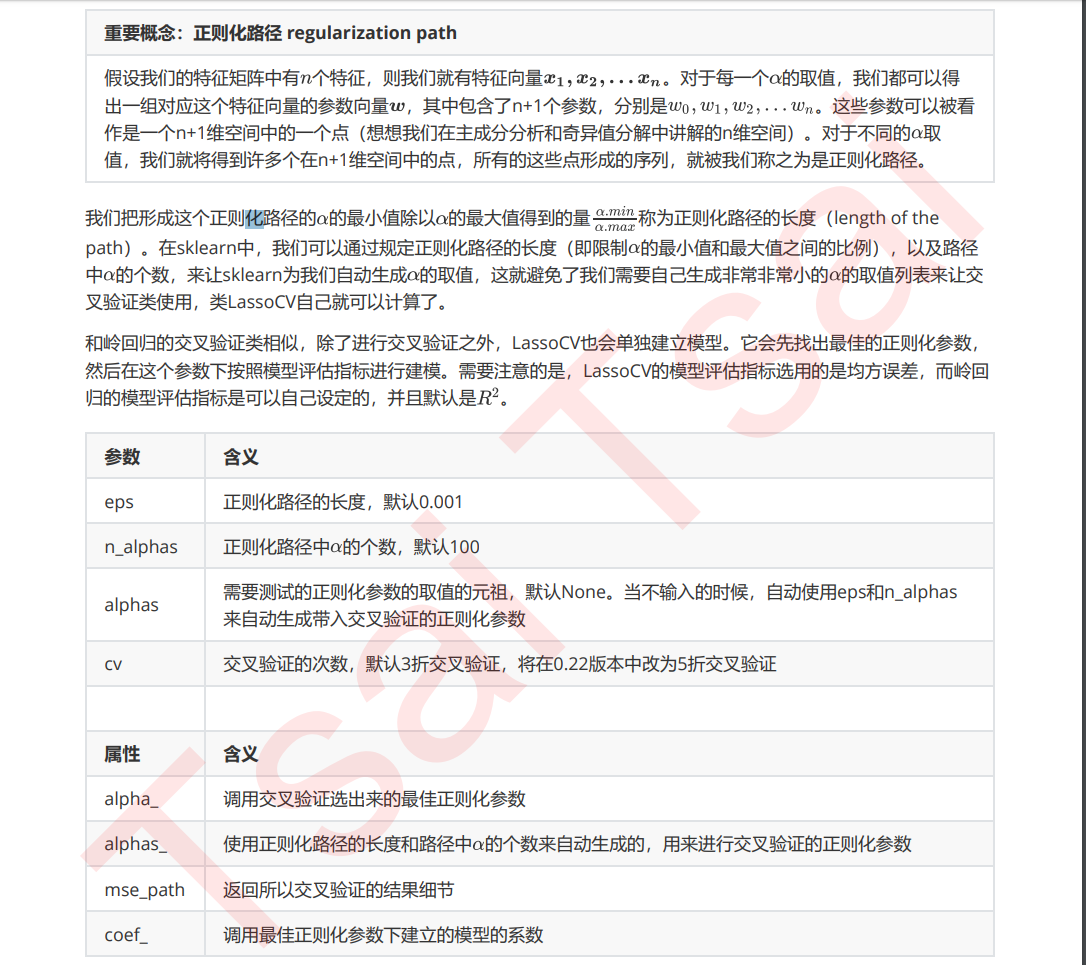

In [71]:
from sklearn.linear_model import LassoCV

In [72]:
alpharange = np.logspace(-10, -2, 200,base=10)
Xtrain.head()
lasso_ = LassoCV(alphas=alpharange #自行输入的alpha的取值范围
               ,cv=5 #交叉验证的折数
               ).fit(Xtrain, Ytrain)

In [73]:
lasso_.alpha_

0.0020729217795953697

In [74]:
lasso_.alphas_.shape

(200,)

In [75]:
alpharange ==np.sort(lasso_.alphas_)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [76]:
lasso_.mse_path_.shape

(200, 5)

In [77]:
lasso_.mse_path_

array([[0.52454913, 0.49856261, 0.55984312, 0.50526576, 0.55262557],
       [0.52361933, 0.49748809, 0.55887637, 0.50429373, 0.55283734],
       [0.52281927, 0.49655113, 0.55803797, 0.5034594 , 0.55320522],
       [0.52213811, 0.49574741, 0.55731858, 0.50274517, 0.55367515],
       [0.52155715, 0.49505688, 0.55669995, 0.50213252, 0.55421553],
       [0.52106069, 0.49446226, 0.55616707, 0.50160604, 0.55480104],
       [0.5206358 , 0.49394903, 0.55570702, 0.50115266, 0.55541214],
       [0.52027135, 0.49350539, 0.55530895, 0.50076146, 0.55603333],
       [0.51995825, 0.49312085, 0.5549639 , 0.50042318, 0.55665306],
       [0.5196886 , 0.49278705, 0.55466406, 0.50013007, 0.55726225],
       [0.51945602, 0.49249647, 0.55440306, 0.49987554, 0.55785451],
       [0.51925489, 0.49224316, 0.55417527, 0.49965404, 0.55842496],
       [0.51908068, 0.49202169, 0.55397615, 0.49946088, 0.55897049],
       [0.51892938, 0.49182782, 0.55380162, 0.49929206, 0.55948886],
       [0.51879778, 0.49165759, 0.

In [78]:
lasso_.mse_path_.mean(axis=1).shape

(200,)

In [79]:
lasso_.coef_

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [80]:
lasso_.score(Xtest,Ytest)

0.6038982670571438

In [81]:
ls_ = LassoCV(eps=0.00001
             ,n_alphas=200
             ,cv=5
               ).fit(Xtrain, Ytrain)

In [82]:
ls_.alpha_

0.0021023592073794103

In [83]:
ls_.alphas_ #查看所有自动生成的alpha取值

array([2.94059737e+01, 2.77530000e+01, 2.61929436e+01, 2.47205814e+01,
       2.33309838e+01, 2.20194985e+01, 2.07817347e+01, 1.96135482e+01,
       1.85110281e+01, 1.74704830e+01, 1.64884292e+01, 1.55615788e+01,
       1.46868286e+01, 1.38612501e+01, 1.30820791e+01, 1.23467070e+01,
       1.16526718e+01, 1.09976498e+01, 1.03794480e+01, 9.79599669e+00,
       9.24534244e+00, 8.72564166e+00, 8.23515439e+00, 7.77223847e+00,
       7.33534406e+00, 6.92300844e+00, 6.53385110e+00, 6.16656913e+00,
       5.81993289e+00, 5.49278182e+00, 5.18402062e+00, 4.89261556e+00,
       4.61759101e+00, 4.35802619e+00, 4.11305207e+00, 3.88184848e+00,
       3.66364134e+00, 3.45770011e+00, 3.26333527e+00, 3.07989611e+00,
       2.90676846e+00, 2.74337269e+00, 2.58916175e+00, 2.44361934e+00,
       2.30625819e+00, 2.17661841e+00, 2.05426596e+00, 1.93879121e+00,
       1.82980754e+00, 1.72695009e+00, 1.62987447e+00, 1.53825569e+00,
       1.45178699e+00, 1.37017889e+00, 1.29315816e+00, 1.22046693e+00,
      

In [84]:
ls_.alphas_.shape

(200,)

In [85]:
ls_.score(Xtest,Ytest)

0.603889474903295

In [86]:
ls_.coef_

array([ 4.29760270e-01,  1.03644986e-02, -9.30574337e-02,  5.50691025e-01,
        1.15614966e-06, -3.31899990e-03, -4.10414902e-01, -4.22357547e-01])

In [87]:
ls_.score(Xtest,Ytest)

0.603889474903295

In [88]:
#多项式回归

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
rnd = np.random.RandomState(42)
x = rnd.uniform(-3,3,size=100)
y = np.sin(x) +rnd.normal(size=len(x))/3



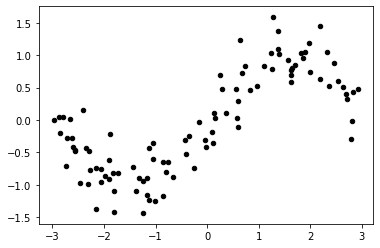

In [91]:
plt.scatter(x, y,marker='o',c='k',s=20)
plt.show()

In [92]:
X = x.reshape(-1,1)


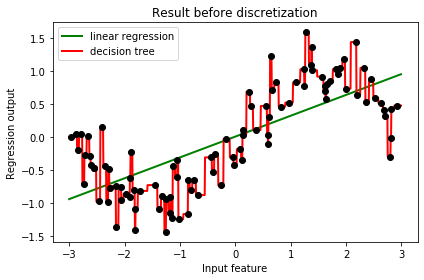

In [93]:
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)
#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
Y = np.sin(line) +rnd.normal(size=line.shape[0])/3
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [94]:
TreeR.predict(line) -Y

array([[ 0.13692888, -0.34324851,  0.22948179, ...,  0.64108612,
         0.87154328,  0.71378011],
       [ 0.14286626, -0.33731113,  0.23541917, ...,  0.6470235 ,
         0.87748066,  0.71971749],
       [ 0.14879835, -0.33137905,  0.24135126, ...,  0.65295559,
         0.88341274,  0.72564957],
       ...,
       [-0.16310717, -0.64328457, -0.07055427, ...,  0.34105007,
         0.57150722,  0.41374405],
       [-0.1571806 , -0.63735799, -0.06462769, ...,  0.34697664,
         0.5774338 ,  0.41967063],
       [-0.15124851, -0.63142591, -0.0586956 , ...,  0.35290873,
         0.58336588,  0.42560271]])

In [95]:
# 使用分箱处理非线性问题
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X_binned = enc.fit_transform(X)

In [96]:
X.shape

(100, 1)

In [97]:

pd.DataFrame(X_binned.toarray()).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
LinearR_ = LinearRegression().fit(X_binned, y)
line_binned = enc.fit_transform(line)

LinearR_.predict(line_binned).shape

(1000,)

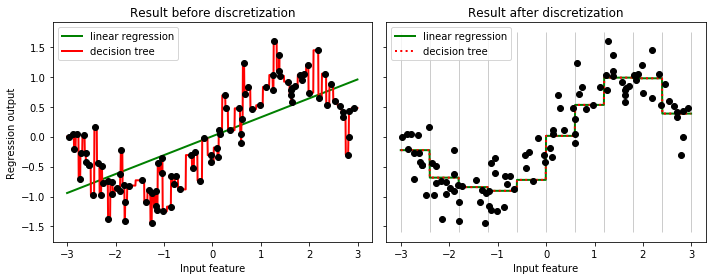

In [109]:
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
line_binned = enc.fit_transform(line)
line_binned.shape
fig,(ax1,ax2) = plt.subplots(ncols=2,sharey=True,figsize=(10,4))
ax1.plot(line,LinearR.predict(line),linewidth=2,color='green',label='linear regression')
ax1.plot(line,TreeR.predict(line),linewidth=2,color='red',label='decision tree')
ax1.plot(X[:,0],y,'o',c='k')
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
#使用分箱数据进行建模
LinearR_ = LinearRegression().fit(X_binned, y)
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
#进行预测，在图2中布置在分箱数据上进行预测的结果
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
#绘制和箱宽一致的竖线
ax2.vlines(enc.bin_edges_[0] #x轴
           , *plt.gca().get_ylim() #y轴的上限和下限
           , linewidth=1
           , alpha=.2)
#将原始数据分布放置在图像上
ax2.plot(X[:, 0], y, 'o', c='k')
#其他绘图设定
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

0.9441330750510549


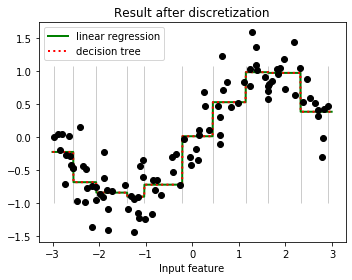

In [113]:
enc = KBinsDiscretizer(n_bins=10,encode="onehot")
X_binned = enc.fit_transform(X)
line_binned = enc.transform(line)
fig, ax2 = plt.subplots(1,figsize=(5,4))
LinearR_ = LinearRegression().fit(X_binned, y)
print(LinearR_.score(line_binned,np.sin(line)))
TreeR_ = DecisionTreeRegressor(random_state=0).fit(X_binned, y)
ax2.plot(line #横坐标
         , LinearR_.predict(line_binned) #分箱后的特征矩阵的结果
         , linewidth=2
         , color='green'
         , linestyle='-'
         , label='linear regression')
ax2.plot(line, TreeR_.predict(line_binned), linewidth=2, color='red',
         linestyle=':', label='decision tree')
ax2.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)
ax2.plot(X[:, 0], y, 'o', c='k')
ax2.legend(loc="best")
ax2.set_xlabel("Input feature")
ax2.set_title("Result after discretization")
plt.tight_layout()
plt.show()

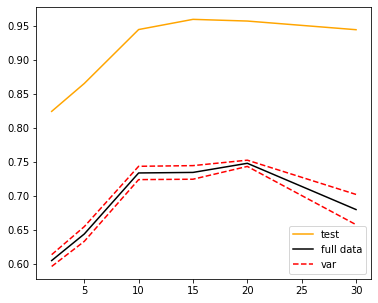

In [114]:
from sklearn.model_selection import cross_val_score as CVS
import numpy as np
pred,score,var = [], [], []
binsrange = [2,5,10,15,20,30]
for i in binsrange:
    #实例化分箱类
    enc = KBinsDiscretizer(n_bins=i,encode="onehot")
    #转换数据
    X_binned = enc.fit_transform(X)
    line_binned = enc.transform(line)
    #建立模型
    LinearR_ = LinearRegression()
    #全数据集上的交叉验证
    cvresult = CVS(LinearR_,X_binned,y,cv=5)
    score.append(cvresult.mean())
    var.append(cvresult.var())
    #测试数据集上的打分结果
    pred.append(LinearR_.fit(X_binned,y).score(line_binned,np.sin(line)))
#绘制图像
plt.figure(figsize=(6,5))
plt.plot(binsrange,pred,c="orange",label="test")
plt.plot(binsrange,score,c="k",label="full data")
plt.plot(binsrange,score+np.array(var)*0.5,c="red",linestyle="--",label = "var")
plt.plot(binsrange,score-np.array(var)*0.5,c="red",linestyle="--")
plt.legend()
plt.show()

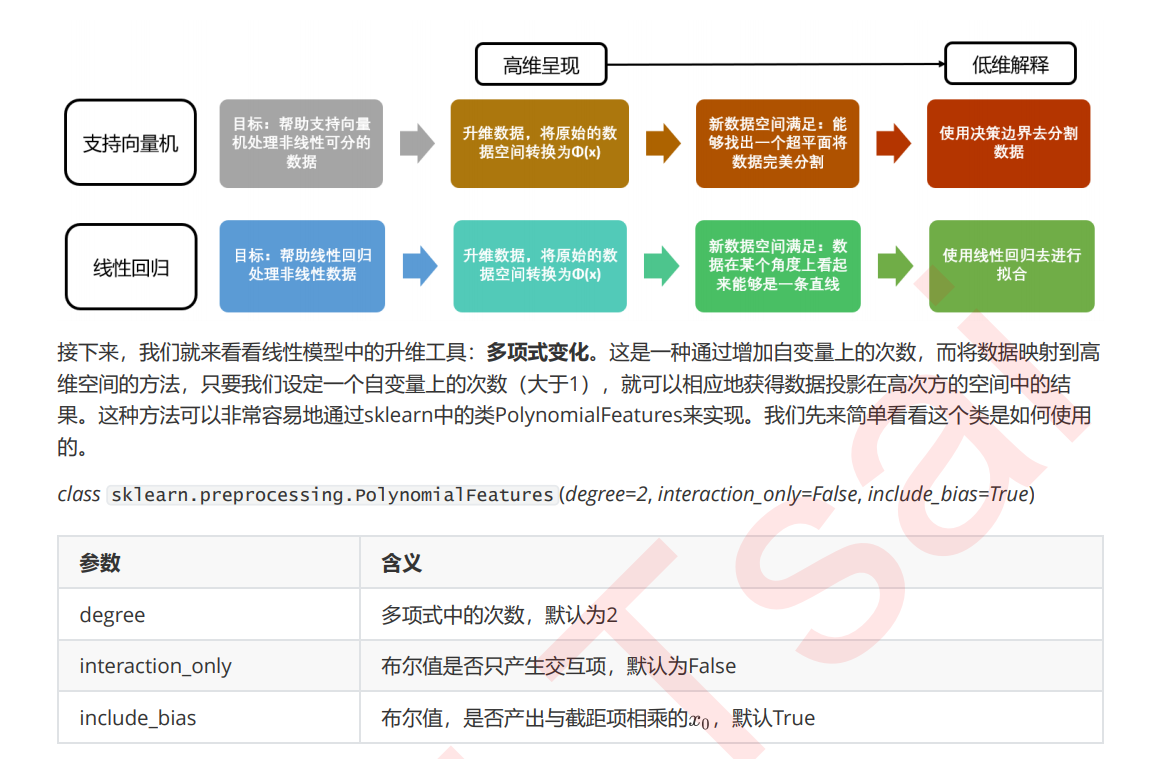

In [117]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [119]:
x = np.arange(1,4).reshape(-1,1)

In [122]:
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x)
x_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [124]:
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression
import numpy as np
rnd = np.random.RandomState(42) #设置随机数种子
X = rnd.uniform(-3, 3, size=100)
y = np.sin(X) + rnd.normal(size=len(X)) / 3
#将X升维，准备好放入sklearn中
X = X.reshape(-1,1)
#创建测试数据，均匀分布在训练集X的取值范围内的一千个点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#原始特征矩阵的拟合结果
LinearR = LinearRegression().fit(X, y)
LinearR.score(X,y)
#对测试数据的拟合
LinearR.score(line,np.sin(line))
#多项式拟合，设定高次项
d=5
#进行高此项转换
poly = PF(degree=d)
X_ = poly.fit_transform(X)
line_ = PF(degree=d).fit_transform(line)
#训练数据的拟合
LinearR_ = LinearRegression().fit(X_, y)
LinearR_.score(X_,y)
#测试数据的拟合
LinearR_.score(line_,np.sin(line))

0.9868904451787978

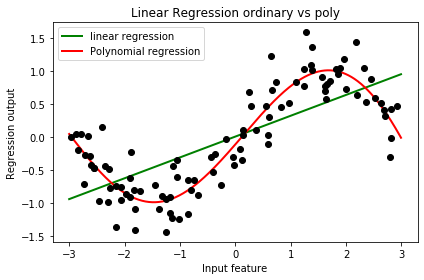

In [125]:
import matplotlib.pyplot as plt
d=5
#和上面展示一致的建模流程
LinearR = LinearRegression().fit(X, y)
X_ = PF(degree=d).fit_transform(X)
LinearR_ = LinearRegression().fit(X_, y)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_ = PF(degree=d).fit_transform(line)
#放置画布
fig, ax1 = plt.subplots(1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green'
         ,label="linear regression")
ax1.plot(line, LinearR_.predict(line_), linewidth=2, color='red'
         ,label="Polynomial regression")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Linear Regression ordinary vs poly")
plt.tight_layout()
plt.show()

In [ ]:
poly.get_feature_names()